
🔍 Average Cosine Similarity with ESSAY:
Model 1 vs Ref: 0.5809
Model 2 vs Ref: 0.6070

📊 Mean Absolute Differences with ESSAY (per trait):
O: Model 1 = 0.4500, Model 2 = 0.4300
C: Model 1 = 0.4400, Model 2 = 0.4400
E: Model 1 = 0.4400, Model 2 = 0.4100
A: Model 1 = 0.5000, Model 2 = 0.4700
N: Model 1 = 0.4400, Model 2 = 0.4400


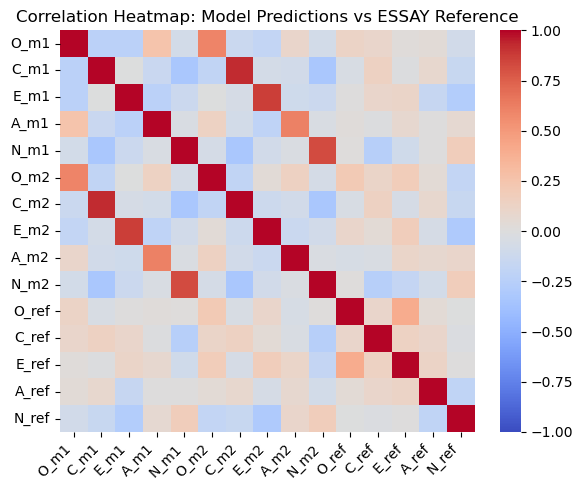

In [10]:
import pandas as pd
import numpy as np
from datasets import load_dataset
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics.pairwise import cosine_similarity

# Load model predictions (limit to 100 rows)
df1 = pd.read_csv('C:/Users/91875/Desktop/metsys1.csv').iloc[:100].reset_index(drop=True)
df2 = pd.read_csv('C:/Users/91875/Desktop/met301.csv').iloc[:100].reset_index(drop=True)

# Load Pandora dataset (first 100 samples)
dataset = load_dataset("jingjietan/essays-big5", split="train[:100]")
pandora = pd.DataFrame(dataset)[["O", "C", "E", "A", "N"]].reset_index(drop=True)

# Rename columns to avoid clashes after merging
df1.columns = [col + '_m1' for col in df1.columns]
df2.columns = [col + '_m2' for col in df2.columns]
pandora.columns = [col + '_ref' for col in pandora.columns]

# Merge all dataframes side by side
merged = pd.concat([df1, df2, pandora], axis=1)
merged.fillna(0, inplace=True)

# Define trait columns
traits = ['O', 'C', 'E', 'A', 'N']

# Select all relevant columns for NaN check
cols_to_check = [col + suffix for suffix in ['_m1', '_m2', '_ref'] for col in traits]

# Drop rows with any NaNs in these columns
merged_clean = merged.dropna(subset=cols_to_check).reset_index(drop=True)

# Extract numpy arrays and ensure numeric dtype (float)
m1 = merged_clean[[col + '_m1' for col in traits]].astype(float).values
m2 = merged_clean[[col + '_m2' for col in traits]].astype(float).values
ref = merged_clean[[col + '_ref' for col in traits]].astype(float).values

# Cosine similarity per row (between corresponding rows)
cos_sim_m1_ref = np.array([cosine_similarity(m1[i].reshape(1, -1), ref[i].reshape(1, -1))[0, 0] for i in range(len(m1))])
cos_sim_m2_ref = np.array([cosine_similarity(m2[i].reshape(1, -1), ref[i].reshape(1, -1))[0, 0] for i in range(len(m2))])

print("\n🔍 Average Cosine Similarity with ESSAY:")
print(f"Model 1 vs Ref: {cos_sim_m1_ref.mean():.4f}")
print(f"Model 2 vs Ref: {cos_sim_m2_ref.mean():.4f}")

# Mean Absolute Difference per trait (across all samples)
mad_m1_ref = np.mean(np.abs(m1 - ref), axis=0)
mad_m2_ref = np.mean(np.abs(m2 - ref), axis=0)

print("\n📊 Mean Absolute Differences with ESSAY (per trait):")
for i, trait in enumerate(traits):
    print(f"{trait}: Model 1 = {mad_m1_ref[i]:.4f}, Model 2 = {mad_m2_ref[i]:.4f}")

# Correlation heatmaps between model predictions and reference traits

# Combine all predictions and references for correlation analysis
corr_df = pd.DataFrame({
    **{f"{t}_m1": merged_clean[t + '_m1'] for t in traits},
    **{f"{t}_m2": merged_clean[t + '_m2'] for t in traits},
    **{f"{t}_ref": merged_clean[t + '_ref'] for t in traits},
})

corr_matrix = corr_df.corr()

plt.figure(figsize=(6, 5))


sns.heatmap(merged.corr(), cmap='coolwarm', annot=False, vmin=-1, vmax=1)
plt.title("Correlation Heatmap: Model Predictions vs ESSAY Reference")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


🔍 Average Cosine Similarity with ESSAY:
Model 1 vs Ref: 0.5548
Model 2 vs Ref: 0.5542

📊 Mean Absolute Differences with ESSAY (per trait):
O: Model 1 = 0.4100, Model 2 = 0.4100
C: Model 1 = 0.4500, Model 2 = 0.4500
E: Model 1 = 0.4200, Model 2 = 0.4300
A: Model 1 = 0.4600, Model 2 = 0.4400
N: Model 1 = 0.4600, Model 2 = 0.4600


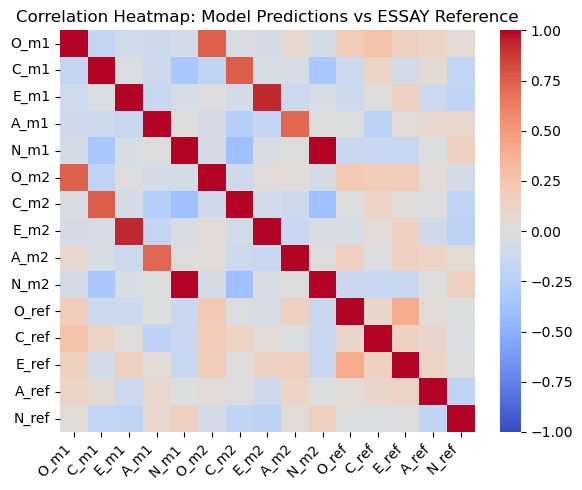

In [11]:
import pandas as pd
import numpy as np
from datasets import load_dataset
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics.pairwise import cosine_similarity

# Load model predictions (limit to 100 rows)
df1 = pd.read_csv('C:/Users/91875/Desktop/metsys2.csv').iloc[:100].reset_index(drop=True)
df2 = pd.read_csv('C:/Users/91875/Desktop/met302.csv').iloc[:100].reset_index(drop=True)

# Load Pandora dataset (first 100 samples)
dataset = load_dataset("jingjietan/essays-big5", split="train[:100]")
pandora = pd.DataFrame(dataset)[["O", "C", "E", "A", "N"]].reset_index(drop=True)

# Rename columns to avoid clashes after merging
df1.columns = [col + '_m1' for col in df1.columns]
df2.columns = [col + '_m2' for col in df2.columns]
pandora.columns = [col + '_ref' for col in pandora.columns]

# Merge all dataframes side by side
merged = pd.concat([df1, df2, pandora], axis=1)
merged.fillna(0, inplace=True)

# Define trait columns
traits = ['O', 'C', 'E', 'A', 'N']

# Select all relevant columns for NaN check
cols_to_check = [col + suffix for suffix in ['_m1', '_m2', '_ref'] for col in traits]

# Drop rows with any NaNs in these columns
merged_clean = merged.dropna(subset=cols_to_check).reset_index(drop=True)

# Extract numpy arrays and ensure numeric dtype (float)
m1 = merged_clean[[col + '_m1' for col in traits]].astype(float).values
m2 = merged_clean[[col + '_m2' for col in traits]].astype(float).values
ref = merged_clean[[col + '_ref' for col in traits]].astype(float).values

# Cosine similarity per row (between corresponding rows)
cos_sim_m1_ref = np.array([cosine_similarity(m1[i].reshape(1, -1), ref[i].reshape(1, -1))[0, 0] for i in range(len(m1))])
cos_sim_m2_ref = np.array([cosine_similarity(m2[i].reshape(1, -1), ref[i].reshape(1, -1))[0, 0] for i in range(len(m2))])

print("\n🔍 Average Cosine Similarity with ESSAY:")
print(f"Model 1 vs Ref: {cos_sim_m1_ref.mean():.4f}")
print(f"Model 2 vs Ref: {cos_sim_m2_ref.mean():.4f}")

# Mean Absolute Difference per trait (across all samples)
mad_m1_ref = np.mean(np.abs(m1 - ref), axis=0)
mad_m2_ref = np.mean(np.abs(m2 - ref), axis=0)

print("\n📊 Mean Absolute Differences with ESSAY (per trait):")
for i, trait in enumerate(traits):
    print(f"{trait}: Model 1 = {mad_m1_ref[i]:.4f}, Model 2 = {mad_m2_ref[i]:.4f}")

# Correlation heatmaps between model predictions and reference traits

# Combine all predictions and references for correlation analysis
corr_df = pd.DataFrame({
    **{f"{t}_m1": merged_clean[t + '_m1'] for t in traits},
    **{f"{t}_m2": merged_clean[t + '_m2'] for t in traits},
    **{f"{t}_ref": merged_clean[t + '_ref'] for t in traits},
})

corr_matrix = corr_df.corr()

plt.figure(figsize=(6, 5))


sns.heatmap(merged.corr(), cmap='coolwarm', annot=False, vmin=-1, vmax=1)
plt.title("Correlation Heatmap: Model Predictions vs ESSAY Reference")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()



🔍 Average Cosine Similarity with ESSAY:
Model 1 vs Ref: 0.5728
Model 2 vs Ref: 0.5533

📊 Mean Absolute Differences with ESSAY (per trait):
O: Model 1 = 0.3900, Model 2 = 0.4200
C: Model 1 = 0.4600, Model 2 = 0.4400
E: Model 1 = 0.4100, Model 2 = 0.4200
A: Model 1 = 0.4100, Model 2 = 0.4900
N: Model 1 = 0.4700, Model 2 = 0.4500


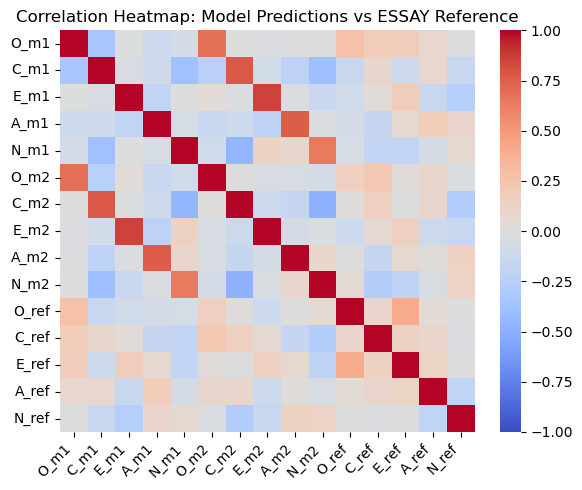

In [12]:
import pandas as pd
import numpy as np
from datasets import load_dataset
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics.pairwise import cosine_similarity

# Load model predictions (limit to 100 rows)
df1 = pd.read_csv('C:/Users/91875/Desktop/metsys3.csv').iloc[:100].reset_index(drop=True)
df2 = pd.read_csv('C:/Users/91875/Desktop/met303.csv').iloc[:100].reset_index(drop=True)

# Load Pandora dataset (first 100 samples)
dataset = load_dataset("jingjietan/essays-big5", split="train[:100]")
pandora = pd.DataFrame(dataset)[["O", "C", "E", "A", "N"]].reset_index(drop=True)

# Rename columns to avoid clashes after merging
df1.columns = [col + '_m1' for col in df1.columns]
df2.columns = [col + '_m2' for col in df2.columns]
pandora.columns = [col + '_ref' for col in pandora.columns]

# Merge all dataframes side by side
merged = pd.concat([df1, df2, pandora], axis=1)
merged.fillna(0, inplace=True)

# Define trait columns
traits = ['O', 'C', 'E', 'A', 'N']

# Select all relevant columns for NaN check
cols_to_check = [col + suffix for suffix in ['_m1', '_m2', '_ref'] for col in traits]

# Drop rows with any NaNs in these columns
merged_clean = merged.dropna(subset=cols_to_check).reset_index(drop=True)

# Extract numpy arrays and ensure numeric dtype (float)
m1 = merged_clean[[col + '_m1' for col in traits]].astype(float).values
m2 = merged_clean[[col + '_m2' for col in traits]].astype(float).values
ref = merged_clean[[col + '_ref' for col in traits]].astype(float).values

# Cosine similarity per row (between corresponding rows)
cos_sim_m1_ref = np.array([cosine_similarity(m1[i].reshape(1, -1), ref[i].reshape(1, -1))[0, 0] for i in range(len(m1))])
cos_sim_m2_ref = np.array([cosine_similarity(m2[i].reshape(1, -1), ref[i].reshape(1, -1))[0, 0] for i in range(len(m2))])

print("\n🔍 Average Cosine Similarity with ESSAY:")
print(f"Model 1 vs Ref: {cos_sim_m1_ref.mean():.4f}")
print(f"Model 2 vs Ref: {cos_sim_m2_ref.mean():.4f}")

# Mean Absolute Difference per trait (across all samples)
mad_m1_ref = np.mean(np.abs(m1 - ref), axis=0)
mad_m2_ref = np.mean(np.abs(m2 - ref), axis=0)

print("\n📊 Mean Absolute Differences with ESSAY (per trait):")
for i, trait in enumerate(traits):
    print(f"{trait}: Model 1 = {mad_m1_ref[i]:.4f}, Model 2 = {mad_m2_ref[i]:.4f}")

# Correlation heatmaps between model predictions and reference traits

# Combine all predictions and references for correlation analysis
corr_df = pd.DataFrame({
    **{f"{t}_m1": merged_clean[t + '_m1'] for t in traits},
    **{f"{t}_m2": merged_clean[t + '_m2'] for t in traits},
    **{f"{t}_ref": merged_clean[t + '_ref'] for t in traits},
})

corr_matrix = corr_df.corr()

plt.figure(figsize=(6, 5))


sns.heatmap(merged.corr(), cmap='coolwarm', annot=False, vmin=-1, vmax=1)
plt.title("Correlation Heatmap: Model Predictions vs ESSAY Reference")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()
